In [1]:
from misvis.mat import MSTM
import os
import re

In [2]:
root = '../../mstm_output'
files = os.listdir(root)

matfiles = {'TE' : dict(), 'TM' : dict()}

for f in files:

    deg = float(re.search(r'\d+(?=deg)', f).group())

    if re.search('TE', f):
        
        matfiles['TE'][deg] = os.path.join(root, f)
    
    else:

        matfiles['TM'][deg] = os.path.join(root, f)


In [3]:
angle = -190

angle % 360

170

4950.0 -4950.0
3.031000827889699e-13 0.0 4950.0 4950.0
4410.482294732421 -4410.482294732421
-2247.252973710756 -2247.252973710756 4410.482294732421 4410.482294732421
3462.7132849534123 -5145.624475609938
-2399.8076202193674 -1919.413316435427 -4329.36755034001 3462.7132849534123
2322.4334706970076 -2975.0231633136273
4151.419311329849 3576.2339323166257 -2695.9632233243833 2322.4334706970076


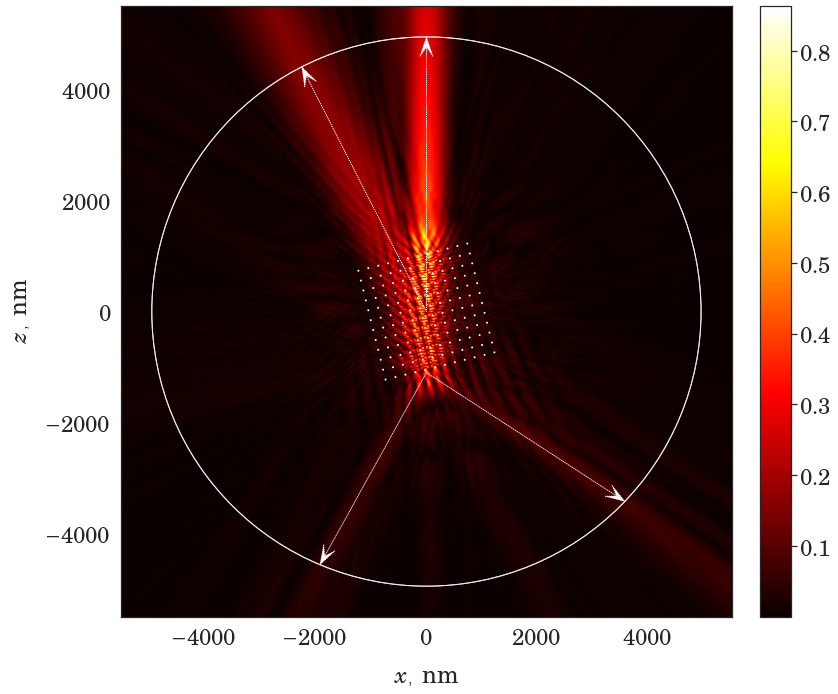

In [17]:
me = MSTM(matfiles['TE'][14.0])
f, a = me.plot_field(
        
        figsize=(12, 12), 
        angles=[(0, 0), (27, 0.0), (151, -0.2), (-123, -0.2)],
        font_scale=2.2,
        reduce=0.9, 
        trim=0,
        target={'alpha' : 1, 'color' : 'white'}
        
    )